In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot  as plt
import folium
from folium.plugins import MarkerCluster
import mplleaflet

AIS_path = r'.\Data'
AIS_data = []

# Iterate over files in the directory
for file_name in os.listdir(AIS_path):
    # Construct full file path
    file_path = os.path.join(AIS_path, file_name)
    
    # Check if the path is a file (not a directory)
    if os.path.isfile(file_path):
        # Open and read the file
        with open(file_path) as f:
            # Load JSON data from the file
            json_data = json.load(f)
            # Append loaded data to the list
            AIS_data.append(json_data)

# Normalize the JSON data
data_normalized = pd.json_normalize(AIS_data, 'data')

# Now you can work with your DataFrame 'data_normalized'
data_normalized

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
2,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


In [3]:
# data_normalized['vessel.type'].unique()
data_normalized['vessel.name'].unique()
# data_normalized['navigation.status'].unique()
# data_normalized['navigation.destination.name'].unique()
# data_normalized['navigation.location.long'].unique()

data_normalized['vessel.name'].value_counts()

vessel.name
TRUDIE            8909
JORDY-M           8906
CHARLOIS          8721
LEVANTE           8202
WESTERSCHELDE     7469
ROMEE             7198
JAN LEEGHWATER    7009
CAAN              7008
HELENA            6414
AARBURG           6339
ORION             1982
SUNMI             1128
MARIBO MAERSK      691
MAYVIEW MAERSK      25
CHARL                5
MKXTG C              2
8ELENA               1
JORDY CD1            1
"5FPV                1
MARIB                1
QE0>0                1
TRUDIH&'L            1
Name: count, dtype: int64

In [5]:
from shapely.geometry import Point, Polygon

# Define the coordinates of the polygon
polygon_coords = [(51.549,3.080), (51.334,3.384), (51.317,4.198), (51.374,4.263), (51.798,6.065), (51.874,6.133), (53.752,6.349), (53.526,4.370)]

# Create a Shapely Polygon object
polygon = Polygon(polygon_coords)

# Function to check if a point (latitude, longitude) is within the polygon
def is_within_polygon(lat, lon):
    point = Point(lat, lon)
    return polygon.contains(point)

# Filter DataFrame based on the polygon
df = data_normalized[data_normalized.apply(lambda row: is_within_polygon(row['navigation.location.lat'], row['navigation.location.long']), axis=1)]

# Drop duplicates
df = df.drop_duplicates(subset=['vessel.imo', 'navigation.time'], keep='last')

# Ekkes spaties weghalen
df['navigation.status'] = df['navigation.status'].str.strip()

df


,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
6,3.0,2021-01-01T00:28:34+00:00,0.0,NaN,4.59393,51.68826,0.2,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


In [6]:
# df['vessel.callsign'].unique()
# df['device.mmsi'].unique()
# df['vessel.imo'].unique()

# Deze is waarschijnlijk het meest betrouwbaar gezien schepen echt hun eigen naam hebben. Niemand gebruikt dubbele namen.
df['vessel.name'].unique()
df['vessel.name'].value_counts()

vessel.name
TRUDIE            8797
JORDY-M           7129
WESTERSCHELDE     6694
LEVANTE           6646
CHARLOIS          5737
JAN LEEGHWATER    5057
ROMEE             4784
CAAN              4773
AARBURG           3025
ORION             1956
HELENA            1126
SUNMI              709
MARIBO MAERSK      681
MAYVIEW MAERSK      15
CHARL                5
MKXTG C              2
8ELENA               1
JORDY CD1            1
"5FPV                1
MARIB                1
QE0>0                1
TRUDIH&'L            1
Name: count, dtype: int64

In [7]:
vessel_name_counts = df['vessel.name'].value_counts()
df = df[df['vessel.name'].isin(vessel_name_counts.index[vessel_name_counts > 5])]

df

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
6,3.0,2021-01-01T00:28:34+00:00,0.0,NaN,4.59393,51.68826,0.2,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


In [8]:
df['vessel.type'].value_counts()

vessel.type
cargo                      30084
dredging-underwater-ops    11751
other                       9557
tanker                      5737
Name: count, dtype: int64

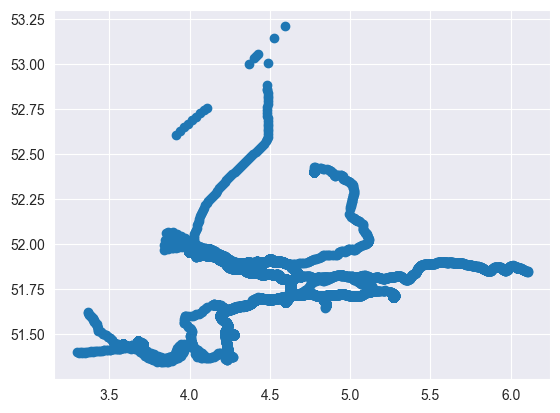

In [9]:
all_locations = plt.scatter(df['navigation.location.long'], df['navigation.location.lat'])

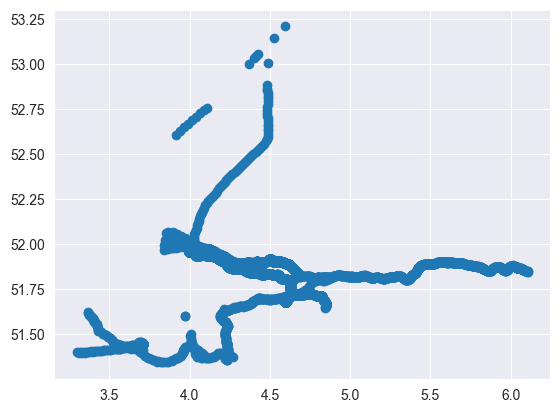

In [10]:
df_test1 = df[(df['vessel.type'] == 'cargo')]
locations = plt.scatter(df_test1['navigation.location.long'], df_test1['navigation.location.lat'])

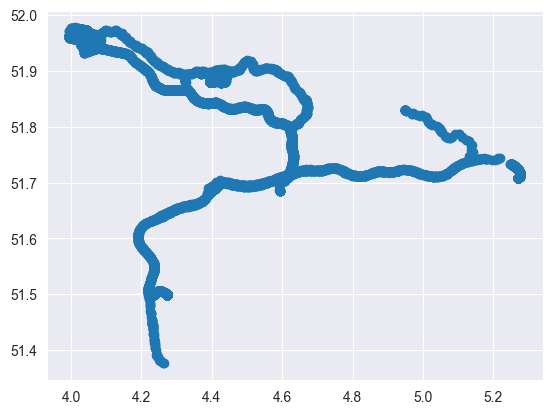

In [11]:
df_test2 = df[(df['vessel.type'] == 'other')]
locations = plt.scatter(df_test2['navigation.location.long'], df_test2['navigation.location.lat'])

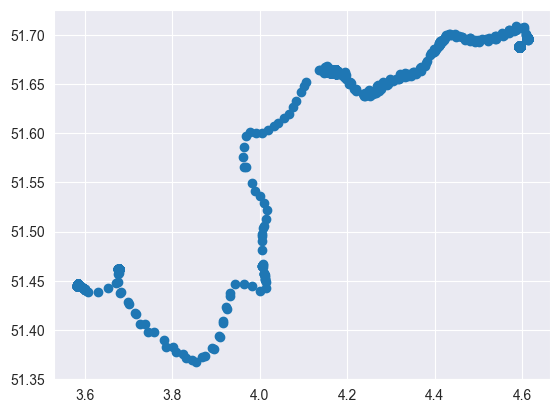

In [12]:
df_test3 = df[(df['vessel.type'] == 'dredging-underwater-ops')]
locations = plt.scatter(df_test3['navigation.location.long'], df_test3['navigation.location.lat'])

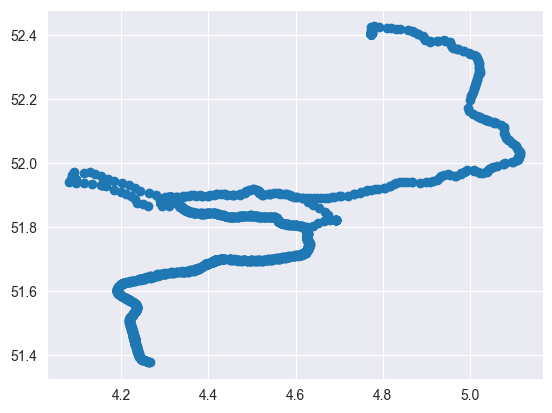

In [13]:
df_test4 = df[(df['vessel.type'] == 'tanker')]
locations = plt.scatter(df_test4['navigation.location.long'], df_test4['navigation.location.lat'])

In [14]:
# Create a folium map centered at the mean latitude and longitude
map_center = [df['navigation.location.lat'].mean(), df['navigation.location.long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

for index, row in df.iterrows():
    folium.Marker(location=[row['navigation.location.lat'], row['navigation.location.long']]).add_to(marker_cluster)

scatter_html = mplleaflet.fig_to_html(plt.gcf())

# Create a folium iframe to embed the scatterplot HTML
scatter_frame = folium.IFrame(html=scatter_html, width=500, height=300)
scatter_popup = folium.Popup(scatter_frame, max_width=500)

# Add the scatterplot as a popup to the folium map
folium.Marker(location=map_center, popup=scatter_popup).add_to(m)
    
# m.save('filtered_data.html')
# m


In [15]:
# Functie om string naar datetime object om te zetten
def convert_to_datetime(datetime_str):
    return pd.to_datetime(datetime_str)

# Nieuwe kolommen toevoegen
df['navigation.time'] = df['navigation.time'].apply(convert_to_datetime)
df['date'] = df['navigation.time'].dt.date
df['time'] = df['navigation.time'].dt.time

# subset = df.iloc[19719:19730]
# print(subset)

C:\Users\dwolf\AppData\Local\Temp\ipykernel_13804\1389379362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['navigation.time'] = df['navigation.time'].apply(convert_to_datetime)
C:\Users\dwolf\AppData\Local\Temp\ipykernel_13804\1389379362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['navigation.time'].dt.date
C:\Users\dwolf\AppData\Local\Temp\ipykernel_13804\1389379362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [16]:
df = df.sort_values(by=['vessel.name', 'group', 'navigation.time'])

# Get the rows where 'navigation.status' and 'vessel.name' changes
df['status_change'] = (df['navigation.status'] != df['navigation.status'].shift(1)) | (df['vessel.name'] != df['vessel.name'].shift(1))

# Increment group number only when status changes
df['group'] = (df['status_change'] == True).cumsum()



# Group by 'vessel.name', 'group', and 'navigation.status' and aggregate start and end time
result = df.groupby(['vessel.name', 'group', 'navigation.status', 'navigation.draught']).agg(start_time=('time', 'first'), end_time=('time', 'last'), start_date=('date', 'first'), end_date=('date', 'last'))

# Format the output
for index, row in result.iterrows():
    print(f"{index[0]}: {row['start_date'].isoformat()} {row['start_time'].isoformat()} - {row['end_date'].isoformat()} {row['end_time'].isoformat()} {index[2]}")

result

KeyError: 'group'

In [17]:
# # Calculate time differences between consecutive records
df['time_diff'] = df['navigation.time'].diff()

# Handle cases where navigation.status or vessel.name changes (i.e., start of a new group)
df['time_diff'] = df['time_diff'].where(df['status_change'] == False, pd.NaT)

# Forward fill NaN values to propagate the time difference across the entire group
df['time_diff'] = df.groupby(['vessel.name', 'group'])['time_diff'].ffill()

# Group by 'vessel.name', 'group', and 'navigation.status' and aggregate total time
final = df.groupby(['vessel.name', 'group', 'navigation.status', 'navigation.draught', 'vessel.type']).agg(total_time=('time_diff', 'sum'),
                                                                       start_time=('time', 'first'),
                                                                       end_time=('time', 'last'),
                                                                       start_date=('date', 'first'),
                                                                       end_date=('date', 'last')).reset_index()

# Format the output
for index, row in final.iterrows():
    total_time = row['total_time']
    total_minutes = total_time.total_seconds() / 60  # Convert total time to minutes
    print(f"{row['vessel.name']}: {row['start_date'].isoformat()} {row['start_time'].isoformat()} - {row['end_date'].isoformat()} {row['end_time'].isoformat()} {row['navigation.status']} - Total Time: {total_minutes:.2f} minutes")

final['total_time_minutes'] = final['total_time'].dt.total_seconds() / 60
final.drop(columns=['total_time'], inplace=True)

final




C:\Users\dwolf\AppData\Local\Temp\ipykernel_13804\3755123726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_diff'] = df['navigation.time'].diff()


KeyError: 'status_change'

In [ ]:
final_df = final[final['navigation.status'] == 'moored']
final_df


In [18]:
moored_time = final_df[['total_time_minutes', 'navigation.draught']]
moored_array = moored_time.values.tolist()

print(moored_array)
print(len(moored_array))

vessel_type = final_df[['vessel.type']]
vessel_array = vessel_type.values.tolist()

print(vessel_array)
print(len(vessel_array))

NameError: name 'final_df' is not defined

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into a training set and test set
# x = moored_array en y = vessel_array
moored_array_train, moored_array_test, vessel_array_train, vessel_array_test = train_test_split(moored_array, vessel_array, test_size=0.3, random_state=42)

# Train a logistic regression model using the training set
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty=None, max_iter=50)
model.fit(moored_array_train, vessel_array_train)

# predict results using the test set
vessel_array_prediction = model.predict(moored_array_test)

# Calculate accuracy
accuracy = accuracy_score(vessel_array_test, vessel_array_prediction)
print("Accuracy using Softmax Regression:", accuracy)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(vessel_array_test, vessel_array_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted vessel type')
plt.ylabel('True vessel type')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
class_report = classification_report(vessel_array_test, vessel_array_prediction)
print("Classification Report:\n", class_report)

NameError: name 'moored_array' is not defined

In [ ]:
# print(df.to_string(index=False))